<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Data Load

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
# Make Convolution Neural Network

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [15]:
# More Setting (Convolution Layer + Fully Connected Layer)

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

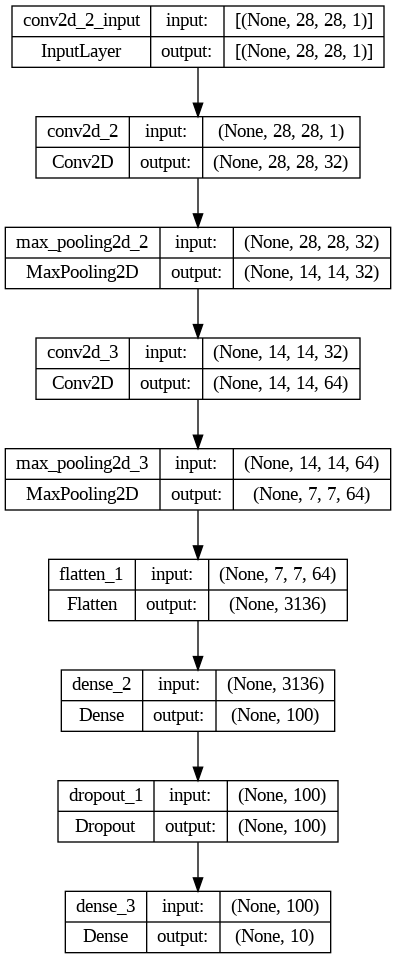

In [16]:
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True)

In [18]:
# Model Compiling

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=5,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
1500/1500 [==============================] - 83s 55ms/step - loss: 0.2873 - accuracy: 0.8975 - val_loss: 0.2519 - val_accuracy: 0.9082
Epoch 2/5
1500/1500 [==============================] - 86s 57ms/step - loss: 0.2536 - accuracy: 0.9062 - val_loss: 0.2350 - val_accuracy: 0.9123
Epoch 3/5
1500/1500 [==============================] - 83s 55ms/step - loss: 0.2284 - accuracy: 0.9161 - val_loss: 0.2266 - val_accuracy: 0.9149
Epoch 4/5
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2088 - accuracy: 0.9234 - val_loss: 0.2263 - val_accuracy: 0.9143
Epoch 5/5
1500/1500 [==============================] - 80s 54ms/step - loss: 0.1938 - accuracy: 0.9291 - val_loss: 0.2319 - val_accuracy: 0.9155


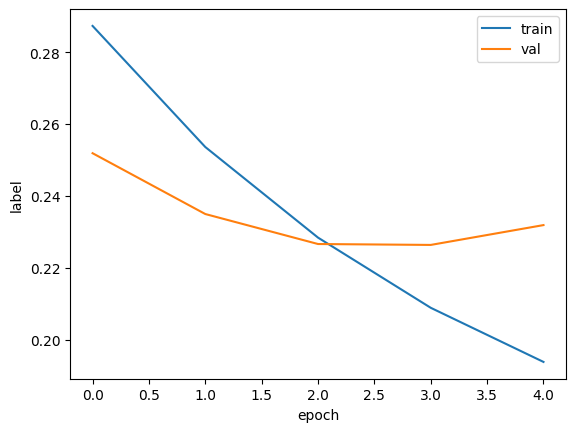

In [19]:
# Show Graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('label')
plt.legend(['train', 'val'])
plt.show()

In [20]:
# Model Evaluating

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2319 - accuracy: 0.9155


[0.2318689227104187, 0.9154999852180481]

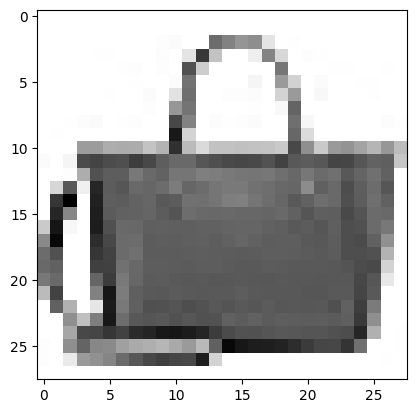

In [11]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 119ms/step
[[1.9753804e-08 3.5901178e-11 3.1897979e-08 5.6224697e-10 1.9219110e-08
  5.7329306e-08 2.5597767e-08 8.5200549e-09 9.9999988e-01 3.3246981e-09]]
